# Reporte 8: 
   ### Nombre: Mayeli Charra Huaman 
   ### Código: 20200275
    

## Parte 1: Reporte
En el  artículo "Los efectos persistentes de la mita minera en el Perú" Melisa Dell (2010) busca responder a la pregunta: ¿De qué manera la influencia de la mita entre 1573-1812 ha persisitido en los actuales distritos donde tuvo vigencia? A lo que plantea la hipótesis de que la influencia persiste a través de sus impactos sobre la tenencia de la tierra y el aprovisionamiento de bienes públicos. En base al método de regresión discontinua, esta autora estudia los efectos a largo plazo de la mita minera y compara su efecto en distritos con similar longitud y latitud en los Andes. Sus hallazgos muestran que los que estuvieron vinculados a la mita minera siglos atrás tienen hoy un menor consumo doméstico, están menos integrados al mercado y a la red de carreteras y sus pobladores son más propensos a ser agricultores de subsistencia. 

Entre las fortalezas del artículo tenemos que analiza las instituciones históricas para explicar el subdesarrollo contemporáneo y el impacto en los resultados económicos para explorar la variación centrada en los canales de persistencia.  Además, estudia la variación exógena de la mita para identificar cómo influye en los canales del desarrollo económico. También, que usa datos como la tenencia de la tierra, los bienes públicos y la participación en el mercado como canales en los que puede medir los efectos que persisten de la mita. Por último, el análisis que ocupa la investigación permite medir en qué grado la mita persiste  a través de la aplicación matemática del uso de la regresión discontinua. 

Por otro lado, en cuanto a las debilidades, la investigación podría considerar las reformas que se dieron y el contexto de la actualidad de forma que su estudió no se vea afectado por alguna variable que no sea explicado por la continuidad no sólo de la mita sino otros fenómenos relacionados a forzar este modo de trabajo como la mita a un sector de la población en específico.  Asimismo, que los resultados en las diferencias en los estándares de vida pueden verse influidos por como las tasas diferenciales de migración de los distritos sometidos por la mita y los que no. 


La contribución del artículo en cuánto a los resultados se resume en que encontró que el efecto de mita a largo plazo disminuye el consumo doméstico e impacta sobre el retraso en el crecimiento.  Además, contribuye con la búsqueda de causas que expliquen la persistente desigualdad económica abarcando un período amplio de tiempo. De forma que los datos que emplea la investigación para examinar los canales de persistencia a través de dos modelos políticos como el Imperio Español y de la República del Perú. En cuanto a los hallazgos en los tres canales de persistencia se tiene que sobre la Tenencia de la tierra y sistemas de trabajo que las haciendas aislaron a los campesino de las instituciones extractivas de la sociedad colonial por lo que se evidencia un gran impacto de la mita sobre la concentración de haciendas. Pero que luego de la Reforma Agraria en la zona de la minería solo el 9% recibió tierras.  En cuánto a los bienes públicos encontró que hay evidencia que la mita históricamente disminuyó el acceso a la educación y que existen diferencias significativas en las redes viales regionales. De forma que la contribución es que se plantea que la data de grandes terratenientes ha condicionado que exista un sistema que alentó el aprovisionamiento de bienes públicos. 

De modo que se encuentre un avance en la pregunta de investigación, se puede tomar otros factores que inciden en la problemática, pues como se menciona en [Manrique, H., & Sanborn, C. (2021)](https://repositorio.up.edu.pe/handle/11354/2898) en su revisión bibliografica otros factores que explican la desigualdad no surgen necesariamente desde la mita si no que las puede explicar la actual economía de exportación minera, problemas específicos del Estado para mantener su liderazgo en el sector como las políticas estatistas que habían afectado a la capacidad exportadora como de transformación. Por otro lado, los impactos de la privatización y la nueva dinámica. A su vez, el modelo de desarrollo basado en la informalidad que repercute en actividades ilegales que incrementan la desigualdad persistente en la zona. 
Para finalizar otro artículo avanza en el asunto de la migración, un factor más actual y cómo afecta en la persistencia de la desigualdad en  [Loayza, N., & Rigolini, J. (2016)](https://www.sciencedirect.com/science/article/abs/pii/S0305750X16000462) donde concluye que este efecto en la desigualdad de la minería se explica, en primer lugar, por los inmigrantes mejor formados que requiere y atrae la actividad minera y, en segundo lugar, por los puestos de trabajo que obtienen algunos nativos de la comunidad en industrias y servicios relacionados con la minería. El impacto desigualador de la minería, tanto entre distritos como dentro de ellos, puede ayudar a explicar el descontento social con la minería en Perú, a pesar de sus enormes ingresos.

Referencias: 
Dell, M. (2010). The persistent effects of Peru's mining mita. Econometrica, 78(6), 1863-1903

Manrique, H., & Sanborn, C. (2021). La minería en el Perú: balance y perspectivas de cinco décadas de investigación. Universidad del Pacífico.

Loayza, N., & Rigolini, J. (2016). The local impact of mining on poverty and inequality: evidence from the commodity boom in Peru. World development, 84, 219-234.



## Parte 2: Código en Python
#### Código hecho por Karen Arevalo y Mayeli Charra


### Instrumental Variables

Para esta primera sección deben darle una leida a The Effect Book principalmente al capitulo de Instrumental Variables.
1. Explique en qué consiste el supuesto de "Relevance"
- Relevance es un supuesto que debemos satisfacer para que las variables instrumentales funcionen.  implica que dado que queremos utilizar al instrumento (Z) para representar a nuestra variable de interés (X), dichas variables deben estar fuertemente correlacionadas.


2. Explique en qué consiste el supuesto de "Validity"
- Validity consiste en suponer que el instrumental Z s una variable que no tiene alguna puert trasera por si mismo. Es decir, que Z puede ser razonablemente excluido del modelo luego que la relación Z → X este incluida. 

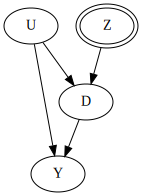

In [9]:
iv = CausalGraphicalModel(nodes = ["Z","D","Y","U"],
                          edges = [("Z","D"),
                                   ("D","Y"),
                                  ("U","D"),
                                  ("U","Y")])
iv = iv.do('Z')
iv.draw()

#Z: queda definido como instrumento
#D: variable a ser instrumentalizada (endogeneidad)

### Ploteo de Histogramas

Tomando en cuenta que la variable nearc4 representa si existe un college en el county debe realizar los siguientes ploteos de histogramas.

- Grafique dos histogramas para la variable años de educación educ para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.


In [12]:
from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from sympy import *
import sklearn
import networkx
import seaborn as sb 

In [10]:
# Cargamos la data

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


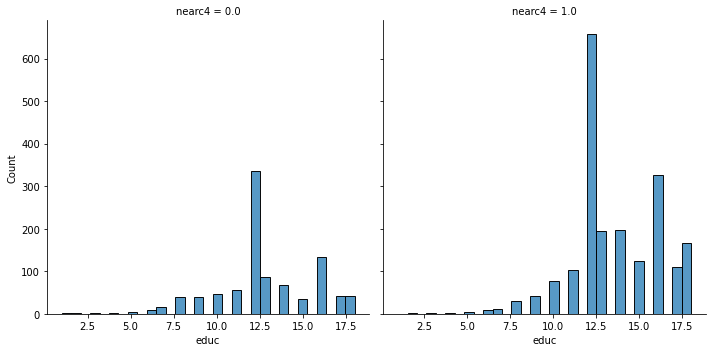

In [13]:
sns.displot(card, x="educ", col="nearc4")
plt.show()

- Grafique dos histogramas para la variable años del logaritmos de los ingresos lwage para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.

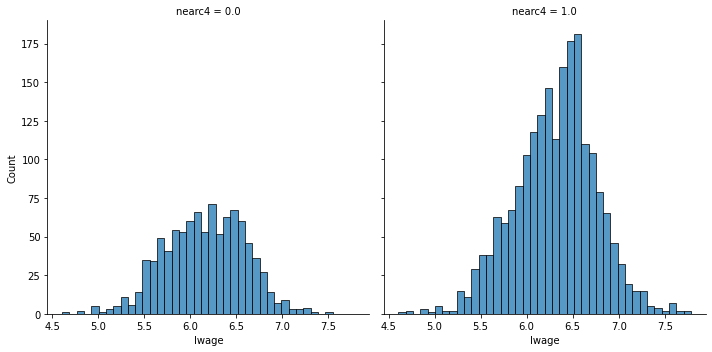

In [14]:
sns.displot(card, x="lwage", col="nearc4")
plt.show()

Comparación: Por un lado, se puede observar que para la variable educ, cuando nearc4 es igual a 1, la cantidad de personas a partir de los 12 años de educación aumenta a >600. Las diferencias entre nearc4 = 0 y nearc4=1 son de casi el doble en los gráficos. También podemos observar qye antes de los 10 años de educación, la variable nearc4 no tiene tanta cantidad en relación a los años de educación. Finalmente, podemos notar que (independientemente de que la variable nearc4 = 0 o =1) el pico más alto suele estar cuando las personas llegan a los 12 años de educación.

Por otro lado, para la variable lwge, cuando la variable nearc4 = 1, la cantidad del número de personas con respecto a sus salarios aumenta considerablemente en casi el doble, con respecto a cuando nearc4=0. Finalmente, se puede apreciar que la distribución en ambos gráficos en un poco disitinta, en tanto la distribución de cuando nearc4=1 es más para la derecha.

### Regresiones

Ahora van a replicar las regresiones que hicimos en clase pero el instrumento Z ya no será nearc4 sino nearc2. 

- Corran una regresion lineal del tipo "lwage ~ educ + exper + black + south + married + smsa", y expliquen los resultados que encuentran.

In [15]:
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa",data=card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        16:51:37   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A partir de los resultados, se tiene que todas las variable son estadisticamente significativo, es decir hay una correlación revisando todos los p.value estos son inferiores a 0.05. Ademas se puede decir que por cada año que aumenta la educación el salario mejora en 0.0712 unidades. 

- Corran una regresion de tipo IV(usando el paquete IV2SLS) donde van a instrumentalizar la variable educ con nearc2 . La regressión debería tener una forma de este tipo "lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc4 ]". Compare los resultados encontrados en la regresión de arriba. Cambió el coeficiente relacionado a educ , por qué?

In [16]:
# There are null values in the dataset, we will fill them with 0
card['married'] = card['married'].fillna(0)

In [17]:
#2SLS
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2 ]", card).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Sun, Nov 13 2022   P-value (F-stat)                0.0000
Time:                        16:51:44   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

Se obtiene un coefiente de 0.3618 a diferencia del 0.0712 de la regresión OLS, es decir aumenta. Sin embargo, revisando el p-value esta variable es mayor a 0.05 siendo de 0.0504 mientras en la regresión OLS esta es menor y cumple con ser estadisticamente significativa. De forma que, aumenta pero no es significativo y este cambio se debe en parte al usar el instrumental la cercanía en la que se vive (nearc2) para explicar la educacción y de esa forma el salario. Por otro lado, evaluando el estadístico F excede 15 y sugiere que no tenemos el porblema de un instrumental débil. 